# <span style="color:blue">Titanic Data</span>
## <span style="color:blue">Importing Libraries</span>

In [1]:
from termcolor import colored, cprint
import acquire
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

# <span style="color:blue">Acquire Data</span>

In [2]:
df = acquire.get_titanic_data()

csv file found and loaded


# <span style="color:green">What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.</span>

# <span style="color:blue">checking the data</span>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [4]:
df.shape

(891, 13)

In [5]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [6]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [8]:
df.passenger_id.nunique()

891

# <span style="color:blue">Dropping unnecessary columns</span>

In [9]:
df.drop(columns=['deck', 'embarked', 'passenger_id', 'class'], inplace=True)

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


# <span style="color:blue">Filling missing values</span>

In [11]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      2
alone            0
dtype: int64

In [12]:
df.age.fillna(df.age.mean(), inplace=True)

In [13]:
df.embark_town.fillna('Southampton', inplace=True)

In [14]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


# <span style="color:blue">Converting data to categorical</span>

In [16]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embark_town     object
alone            int64
dtype: object

In [17]:
df.pclass = df.pclass.astype('object')
df.sibsp = df.sibsp.astype('object')
df.parch = df.parch.astype('object')
df.alone = df.alone.astype('object')
df.dtypes

survived         int64
pclass          object
sex             object
age            float64
sibsp           object
parch           object
fare           float64
embark_town     object
alone           object
dtype: object

# <span style="color:blue">Defining Target Value</span>

In [18]:
Y = df.survived
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

# <span style="color:blue">Defining X Value</span>

In [19]:
X = df.drop(columns='survived')
X.head()

,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,3,female,26.0,0,0,7.9250,Southampton,1
3,1,female,35.0,1,0,53.1000,Southampton,0
4,3,male,35.0,0,0,8.0500,Southampton,1


# <span style="color:blue">Survived Rate</span>

In [20]:
df.survived.value_counts()
df.survived.mean()

0.3838383838383838

# <span style="color:green">Baseline Prediction and Accuracy</span>

In [21]:
df.survived.value_counts()
baseline = df.survived.value_counts().max() / df.survived.value_counts().sum()
print(f'Baseline Prediction: {df.survived.value_counts().idxmax()}')
print(f'Baseline Accuracy: {baseline:.2%}')

Baseline Prediction: 0
Baseline Accuracy: 61.62%


# <span style="color:blue">Splitting Data Into Num and Cat</span>

In [22]:
num = X.select_dtypes(include=np.number)
char = X.select_dtypes(exclude=np.number)

# <span style="color:blue">Outliers</span>

In [23]:
num.describe(percentiles=[.01, .05, .10, .25, .5, .75, .85, .90, .99])

,age,fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
1%,1.000000,0.000000
5%,6.000000,7.225000
10%,16.000000,7.550000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000


# <span style="color:blue">Capping Outliers</span>

In [24]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [25]:
num = num.apply(outlier_cap)

In [26]:
num.describe(percentiles=[.01, .05, .10, .25, .5, .75, .85, .90, .99])

,age,fare
count,891.000000,891.000000
mean,29.642249,31.224767
std,12.815994,42.524125
min,1.000000,0.000000
1%,1.000000,0.000000
5%,6.000000,7.225000
10%,16.000000,7.550000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000


# <span style="color:blue">Encoding Categorical Data</span>

In [27]:
X_char_dum = pd.get_dummies(char, drop_first = True)

In [28]:
X_char_dum.head()

,pclass_2,pclass_3,sex_male,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embark_town_Queenstown,embark_town_Southampton,alone_1
0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


# <span style="color:blue">Combining Data</span>

In [29]:
X_all = pd.concat([num, X_char_dum], axis=1)

# <span style="color:blue">Splitting Data</span>

In [30]:
X_train, X_validate, X_test, y_train, y_validate, y_test = acquire.train_validate_test_split(X_all, Y)

In [31]:
print("Shape of Training Data",X_train.shape)
print("Shape of Validation Data",X_validate.shape)
print("Shape of Testing Data",X_test.shape)
print("Churn Rate in Training Data",y_train.mean())
print("Churn Rate in Validation Data",y_validate.mean())
print("Churn Rate in Testing Data",y_test.mean())

Shape of Training Data (534, 20)
Shape of Validation Data (178, 20)
Shape of Testing Data (179, 20)
Churn Rate in Training Data 0.3838951310861423
Churn Rate in Validation Data 0.38202247191011235
Churn Rate in Testing Data 0.3854748603351955


# <span style="color:blue">Building Decision Tree Model</span>

In [32]:
tree1 = DecisionTreeClassifier(max_depth=4)


# <span style="color:blue">Fitting Model</span>

In [33]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

# <span style="color:blue">Extracting Feature Importance</span>

In [34]:
import pandas as pd
feature_importances=pd.DataFrame(tree1.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
sex_male,0.621642
pclass_3,0.141442
fare,0.136726
age,0.069683
embark_town_Queenstown,0.023733
sibsp_1,0.006775
parch_2,0.000000
embark_town_Southampton,0.000000
parch_6,0.000000
parch_5,0.000000


# <span style="color:blue">Transforming Data</span>

In [35]:
tree1.score(X_train, y_train)

0.8258426966292135

<function matplotlib.pyplot.show(close=None, block=None)>

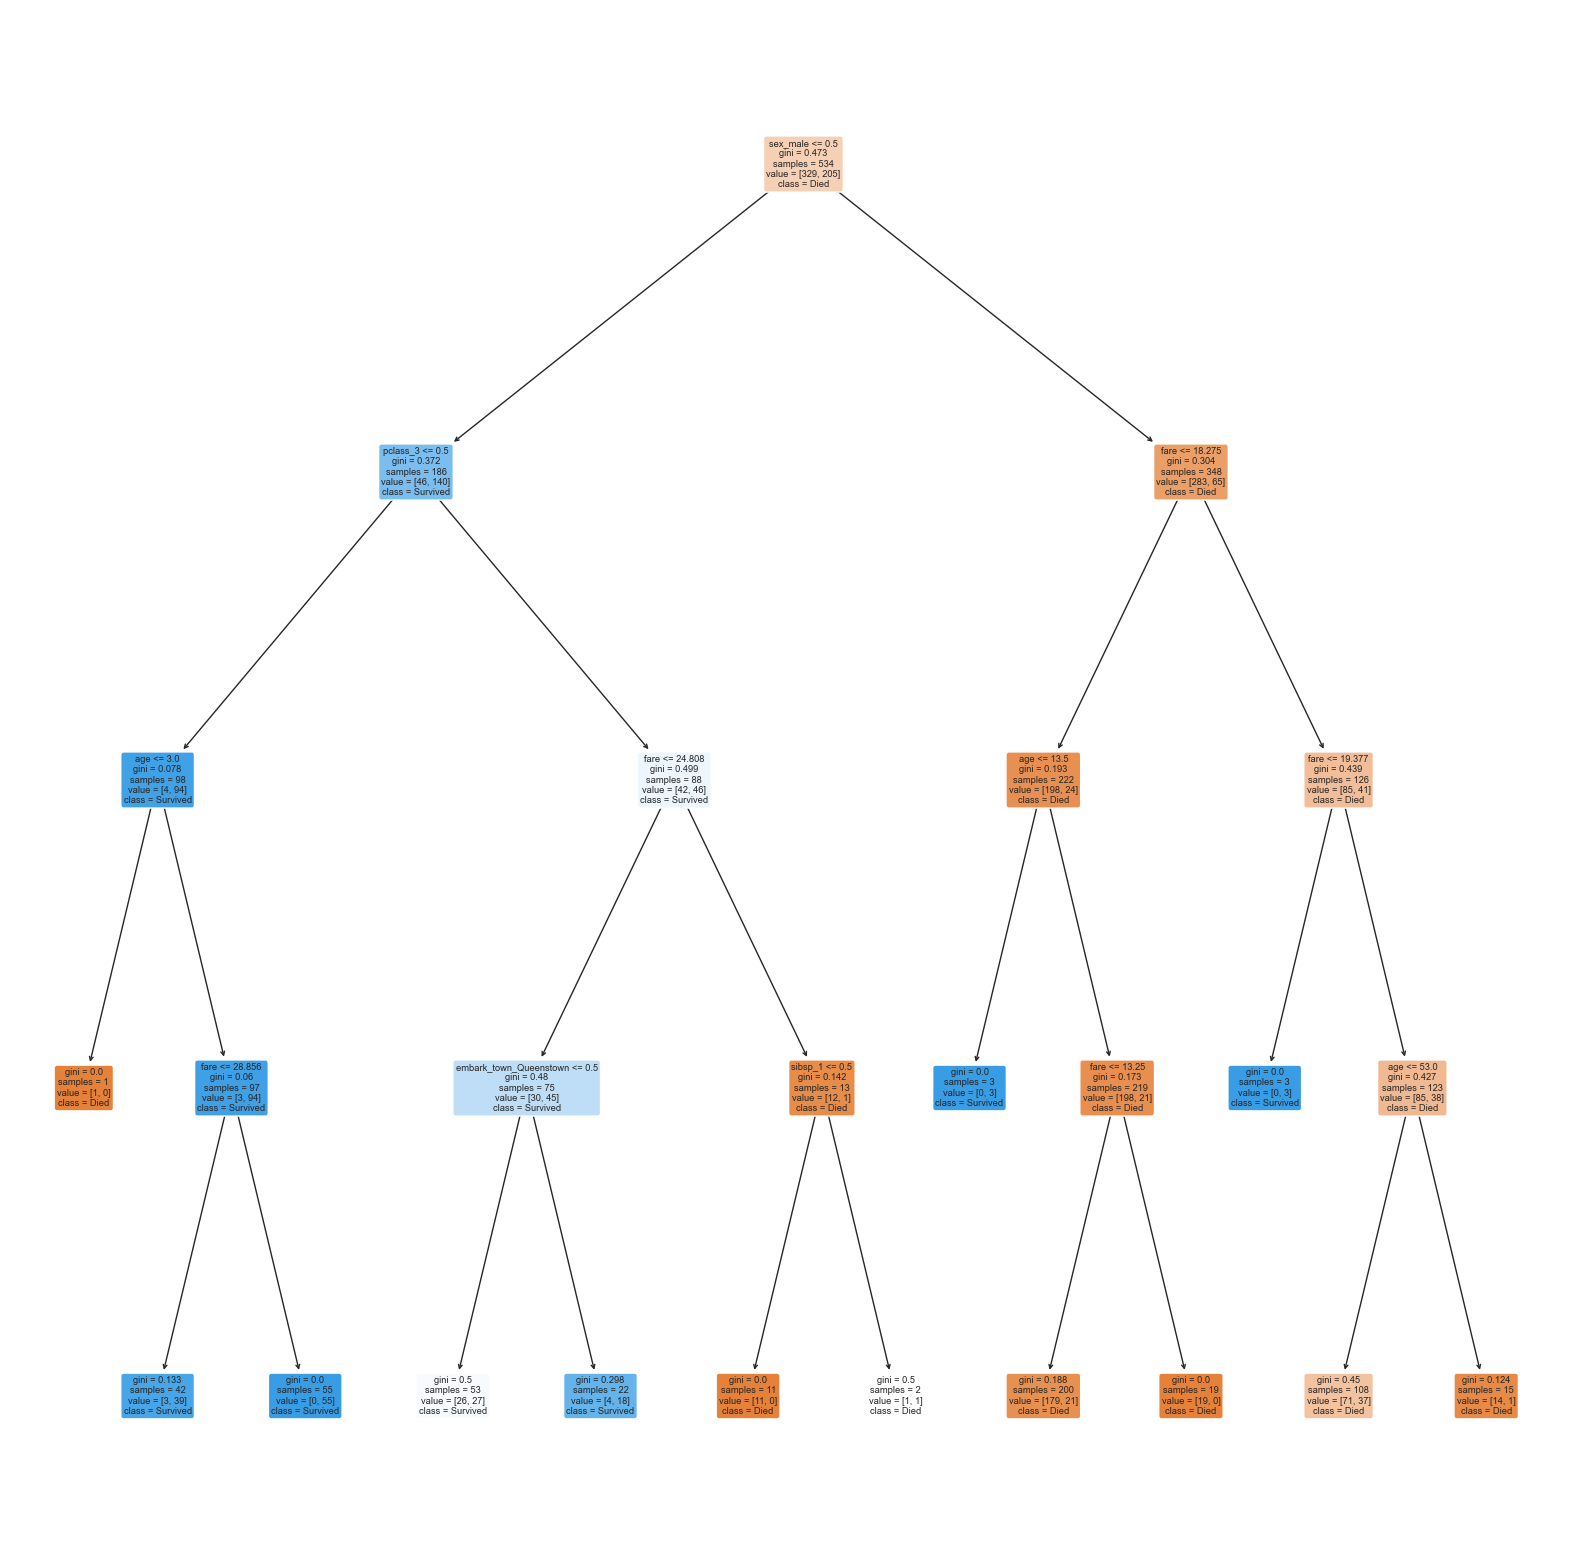

In [36]:
plt.figure(figsize=(20,20))
plot_tree(tree1, filled=True, rounded=True, class_names=['Died', 'Survived'], feature_names=X_train.columns)
plt.show

# <span style="color:blue">Model Evaluation</span>

## <span style="color:blue">Confusion Matrix</span>

In [37]:
y_pred = tree1.predict(X_validate)
pd.crosstab(y_validate, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,95,15
1,19,49


In [38]:
print("Accuracy:",metrics.accuracy_score(y_validate, y_pred))
print("Precision",metrics.precision_score(y_validate,y_pred))
print("Recall",metrics.recall_score(y_validate,y_pred))
print("f1_score",metrics.f1_score(y_validate,y_pred))

Accuracy: 0.8089887640449438
Precision 0.765625
Recall 0.7205882352941176
f1_score 0.7424242424242423


In [39]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.74        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



## <span style="color:blue">model 2</span>

In [40]:
tree2 = DecisionTreeClassifier(max_depth=3)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
tree2.score(X_train, y_train)

0.8258426966292135

In [42]:
y_pred = tree2.predict(X_validate)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_validate, y_pred))
print("Precision",metrics.precision_score(y_validate,y_pred))
print("Recall",metrics.recall_score(y_validate,y_pred))
print("f1_score",metrics.f1_score(y_validate,y_pred))
print(classification_report(y_validate, y_pred))

Accuracy: 0.8089887640449438
Precision 0.765625
Recall 0.7205882352941176
f1_score 0.7424242424242423
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.74        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



## <span style="color:blue">Which model performs better on your in-sample data?</span>
* max depth 4
## <span style="color:blue">Which model performs best on your out-of-sample data, the validate set?</span>
* max depth 4

# <span style="color:blue">Telco Churn Decision Tree</span>

In [44]:
df = acquire.prep_telco()

csv file found and loaded


# <span style="color:blue">checking the data</span>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   monthly_charges                        7043 non-null   float64
 2   total_charges                          7043 non-null   float64
 3   gender_Male                            7043 non-null   uint8  
 4   senior_citizen_Yes                     7043 non-null   uint8  
 5   partner_Yes                            7043 non-null   uint8  
 6   dependents_Yes                         7043 non-null   uint8  
 7   phone_service_Yes                      7043 non-null   uint8  
 8   multiple_lines_No phone service        7043 non-null   uint8  
 9   multiple_lines_Yes                     7043 non-null   uint8  
 10  online_security_No internet service    7043 non-null   uint8  
 11  onli

In [46]:
df.shape

(7043, 31)

In [47]:
df.head()

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,9,65.6,593.30,0,0,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,9,59.9,542.40,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,4,73.9,280.85,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,1,0
3,13,98.0,1237.85,1,1,1,0,1,0,0,...,1,1,1,0,0,1,0,0,1,0
4,3,83.9,267.40,0,1,1,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


In [48]:
df.describe()

,tenure,monthly_charges,total_charges,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.504756,0.162147,0.483033,0.299588,0.903166,0.096834,0.421837,...,0.387903,0.592219,0.265370,0.209144,0.240664,0.439585,0.216669,0.216101,0.335794,0.228880
std,24.559481,30.090047,2266.794470,0.500013,0.368612,0.499748,0.458110,0.295752,0.295752,0.493888,...,0.487307,0.491457,0.441561,0.406726,0.427517,0.496372,0.412004,0.411613,0.472301,0.420141
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df.isnull().sum()

tenure                                   0
monthly_charges                          0
total_charges                            0
gender_Male                              0
senior_citizen_Yes                       0
partner_Yes                              0
dependents_Yes                           0
phone_service_Yes                        0
multiple_lines_No phone service          0
multiple_lines_Yes                       0
online_security_No internet service      0
online_security_Yes                      0
online_backup_No internet service        0
online_backup_Yes                        0
device_protection_No internet service    0
device_protection_Yes                    0
tech_support_No internet service         0
tech_support_Yes                         0
streaming_tv_No internet service         0
streaming_tv_Yes                         0
streaming_movies_No internet service     0
streaming_movies_Yes                     0
paperless_billing_Yes                    0
churn_Yes  

# <span style="color:blue">Dropping unnecessary columns</span>

In [50]:
X = df.drop(columns=['churn_Yes'])


In [51]:
Y = df.churn_Yes

# <span style="color:blue">Splitting Data Into Train, Validate, and Test</span>

In [52]:
X_train, X_validate, X_test, y_train, y_validate, y_test = acquire.train_validate_test_split(X, Y)

In [53]:
print("Shape of Training Data",X_train.shape)
print("Shape of Validation Data",X_validate.shape)
print("Shape of Testing Data",X_test.shape)
print("Churn Rate in Training Data",y_train.mean())
print("Churn Rate in Validation Data",y_validate.mean())
print("Churn Rate in Testing Data",y_test.mean())

Shape of Training Data (4225, 30)
Shape of Validation Data (1409, 30)
Shape of Testing Data (1409, 30)
Churn Rate in Training Data 0.26532544378698225
Churn Rate in Validation Data 0.2654364797728886
Churn Rate in Testing Data 0.2654364797728886


# <span style="color:blue">Building Decision Tree Model</span>

In [54]:
tree1 = DecisionTreeClassifier(max_depth=5)

In [55]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [56]:
import pandas as pd
feature_importances=pd.DataFrame(tree1.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.460025
internet_service_type_Fiber optic,0.330633
total_charges,0.053629
payment_type_Electronic check,0.035351
contract_type_One year,0.023789
tech_support_No internet service,0.018325
streaming_movies_No internet service,0.017989
tech_support_Yes,0.015775
multiple_lines_Yes,0.011777
monthly_charges,0.010931


In [57]:
tree1.score(X_train, y_train)

0.8028402366863905

<function matplotlib.pyplot.show(close=None, block=None)>

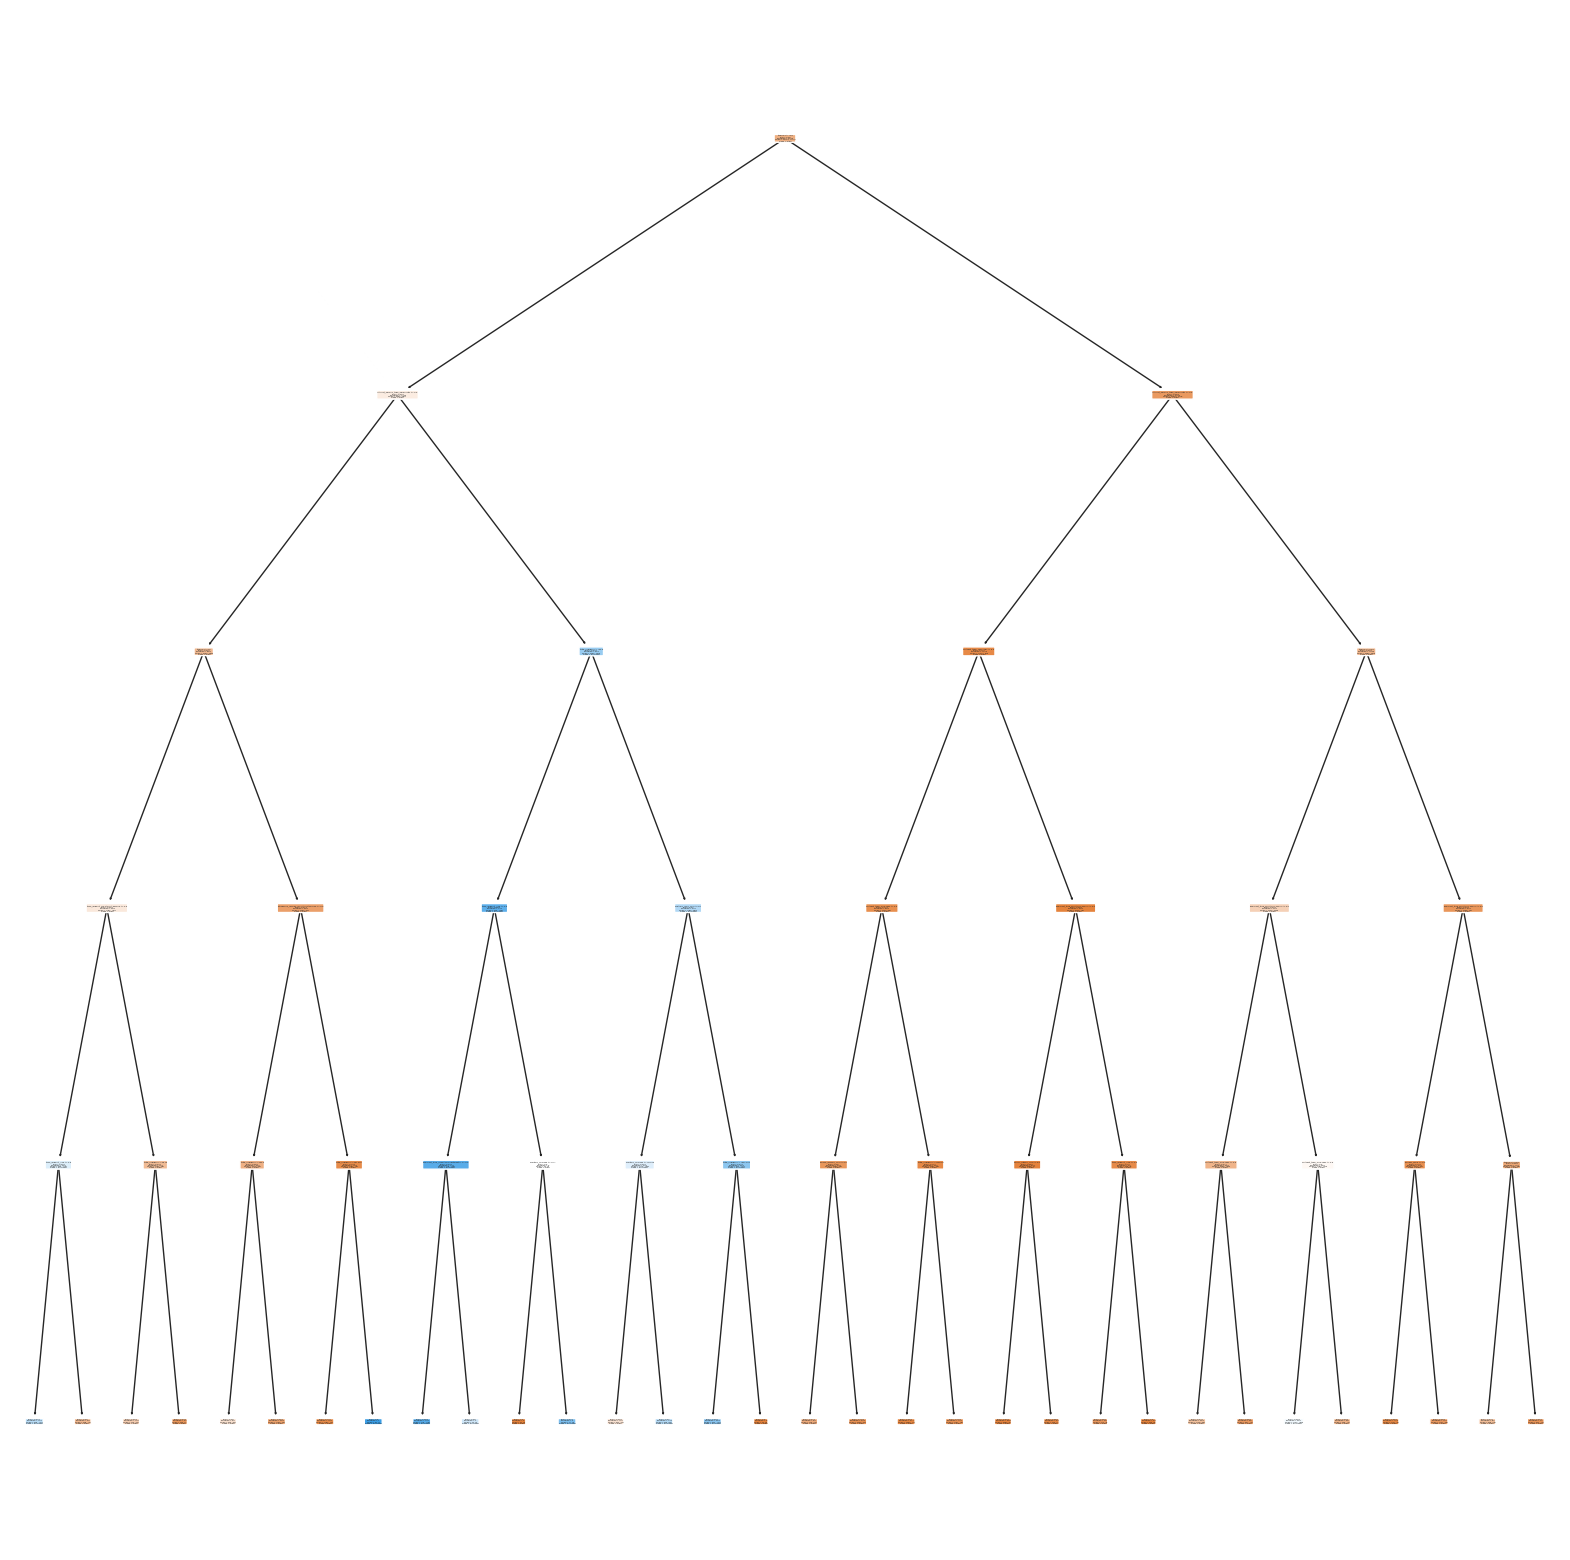

In [58]:
plt.figure(figsize=(20,20))
plot_tree(tree1, filled=True, rounded=True, class_names=['Died', 'Survived'], feature_names=X_train.columns)
plt.show

In [59]:
from sklearn.ensemble import RandomForestClassifier

tree2 = RandomForestClassifier(max_depth=100)

In [60]:
tree2.fit(X_train, y_train)

RandomForestClassifier(max_depth=100)

In [61]:
tree2.score(X_train, y_train)

0.9981065088757396

In [62]:
scores_all = []

for x in range(1,20):

    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)

    #evaluate on validate
    val_acc = tree.score(X_validate, y_validate)

    scores_all.append([x, train_acc, val_acc])

In [63]:
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.head

<bound method NDFrame.head of     max_depth  train_acc   val_acc
0           1   0.734675  0.734564
1           2   0.786982  0.792761
2           3   0.786982  0.792761
3           4   0.791716  0.804116
4           5   0.802840  0.794180
5           6   0.810888  0.789922
6           7   0.824615  0.789922
7           8   0.841420  0.781405
8           9   0.859645  0.772889
9          10   0.884734  0.755855
10         11   0.906036  0.745919
11         12   0.930178  0.744500
12         13   0.948639  0.726757
13         14   0.963314  0.733144
14         15   0.974438  0.729595
15         16   0.982959  0.730305
16         17   0.988639  0.724627
17         18   0.990769  0.731015
18         19   0.994083  0.731725>

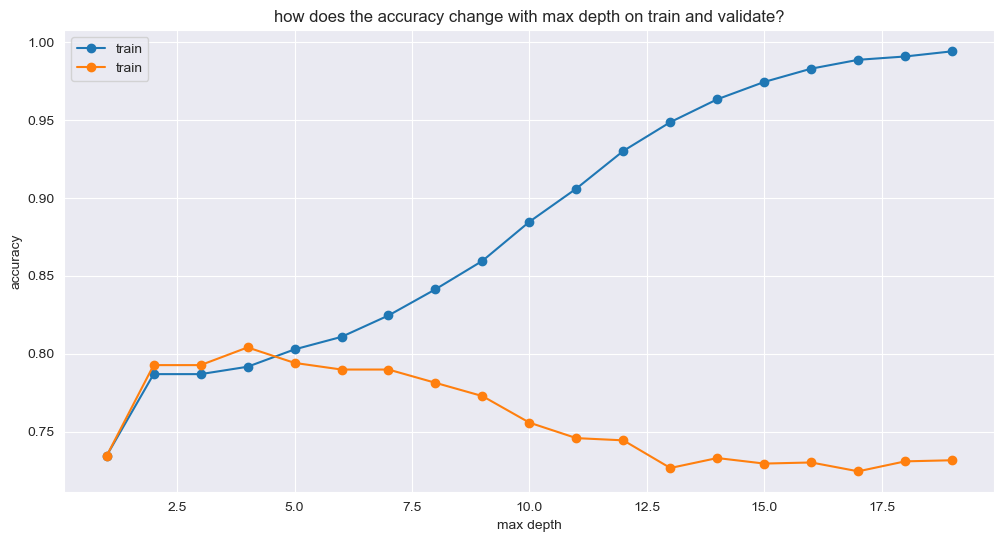

In [64]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='train', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

In [66]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [50, 70, 90, 100, 150] }
tree_grid = GridSearchCV(tree1, cv = 10, param_grid=param_dist,n_jobs = -1)
tree_grid.fit(X_train,y_train)
print('Best mean accuracy score using grid search: \n',tree_grid.best_score_)
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best mean accuracy score using grid search: 
 0.7867309782304236
Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 70}
